In [1]:
import csv
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
import sys

sys.path.insert(0, '../')

from external import ext_functions

DATA_PATH = os.path.join("data")

def load_data(data_path=DATA_PATH) -> (pd.DataFrame):
    csv_path = os.path.join(data_path, "housing.csv")

    return pd.read_csv(csv_path)

## Data Investigation

In [2]:
# loading data

housing_data = load_data()
housing_data.head(15)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
housing_data.tail(15)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20625,-121.52,39.12,37.0,102.0,17.0,29.0,14.0,4.1250,72000.0,INLAND
20626,-121.43,39.18,36.0,1124.0,184.0,504.0,171.0,2.1667,93800.0,INLAND
20627,-121.32,39.13,5.0,358.0,65.0,169.0,59.0,3.0000,162500.0,INLAND
20628,-121.48,39.10,19.0,2043.0,421.0,1018.0,390.0,2.5952,92400.0,INLAND
20629,-121.39,39.12,28.0,10035.0,1856.0,6912.0,1818.0,2.0943,108300.0,INLAND
20630,-121.32,39.29,11.0,2640.0,505.0,1257.0,445.0,3.5673,112000.0,INLAND
20631,-121.40,39.33,15.0,2655.0,493.0,1200.0,432.0,3.5179,107200.0,INLAND
20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND
20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,INLAND
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND


In [4]:
housing_data.index

RangeIndex(start=0, stop=20640, step=1)

In [5]:
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
# data description

housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# ocean proximity

housing_data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
# data description

housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


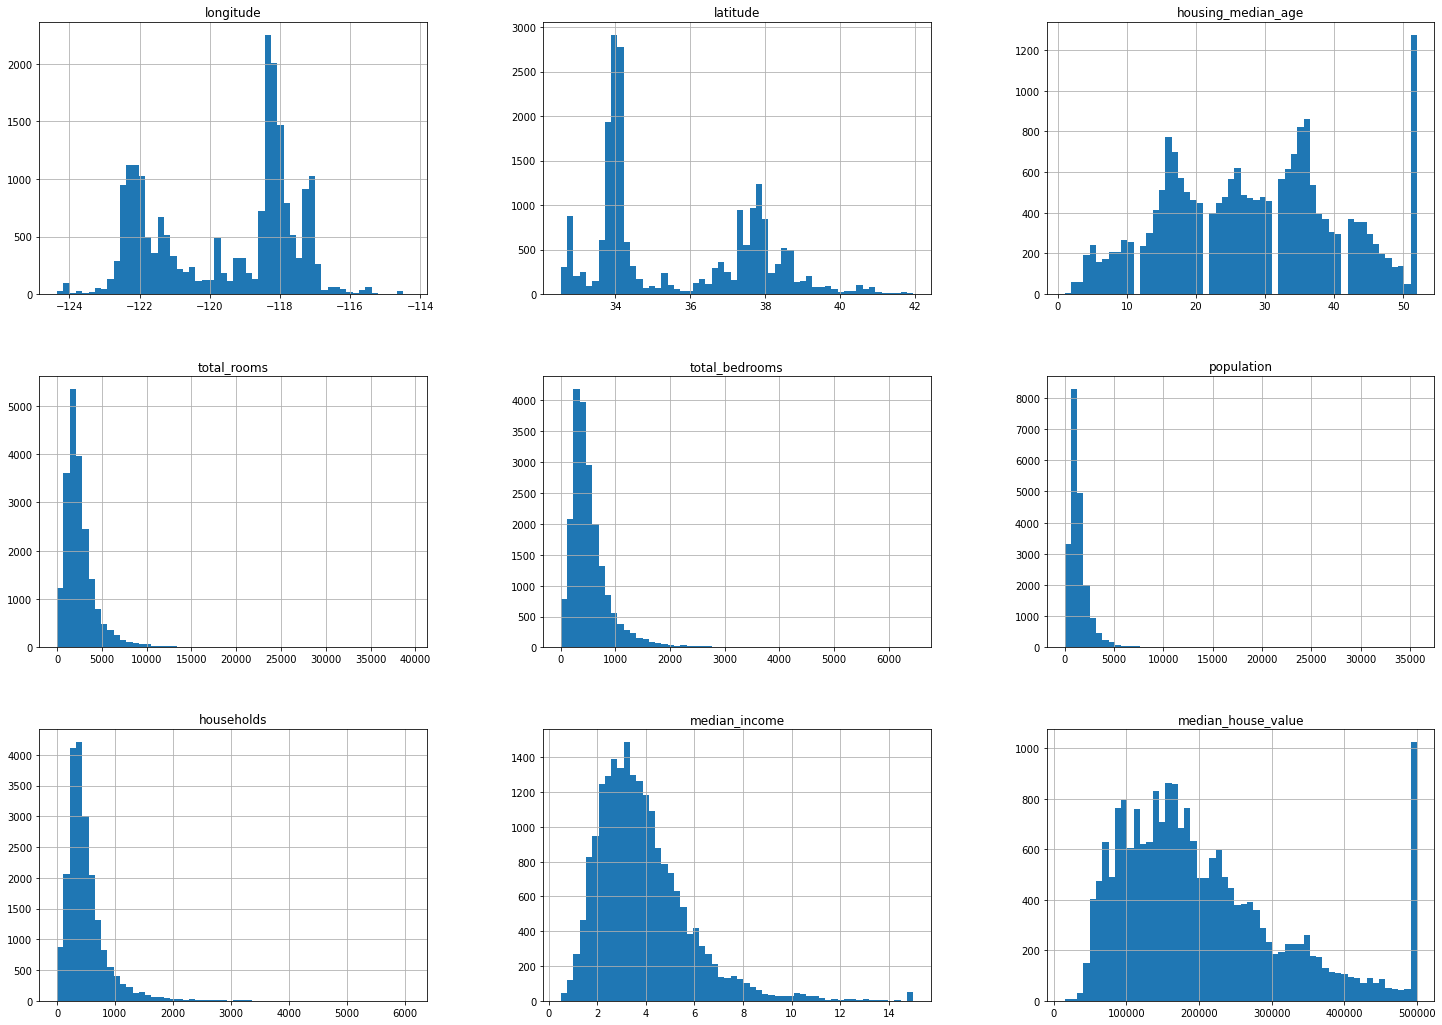

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

# histogram to get a overall feel for the shape of the data
housing_data.hist(bins=56, figsize=(25, 18))
plt.show()

<AxesSubplot:>

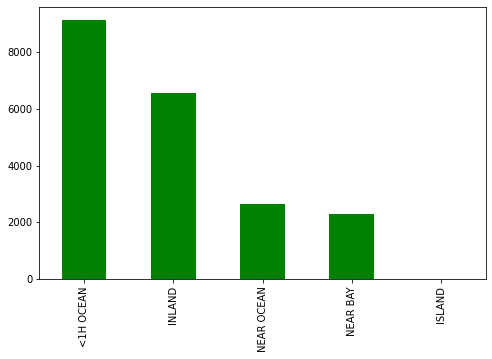

In [10]:
housing_data["ocean_proximity"].value_counts().plot(kind="bar", figsize=(8,5), color="green")

<AxesSubplot:title={'center':'Property Distribution'}, xlabel='latitude', ylabel='longitude'>

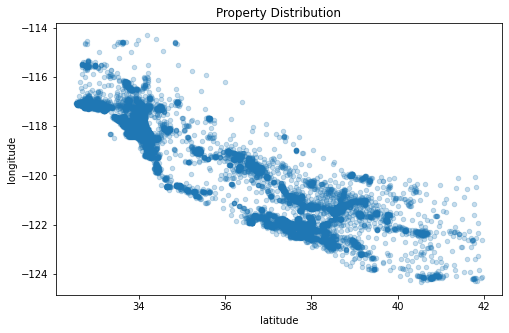

In [11]:
housing_data.plot(kind="scatter", x="latitude", y="longitude", title="Property Distribution", alpha=0.25, figsize=(8,5))

<AxesSubplot:>

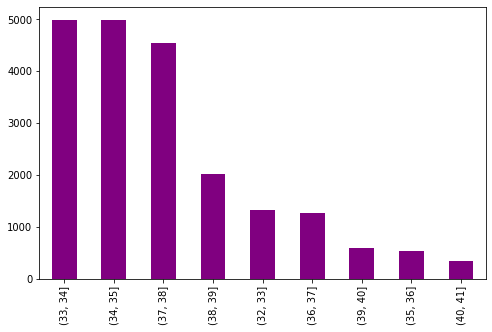

In [12]:
property_distr_cat = pd.cut(housing_data["latitude"], np.arange(32, 42, 1))
property_distr_cat.value_counts().plot.bar(color="purple", figsize=(8,5))

## Training / Test Set Seperation (80/20 standard)

<AxesSubplot:>

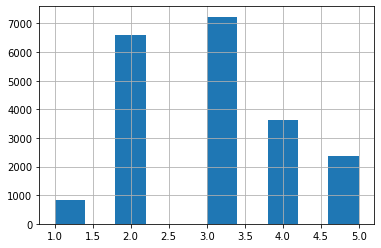

In [13]:
'''
Set seperation based on random sampling -> even though better option for sampling, using stratified sampling for median housing prices objective.
The following process, implements discretization of the continiuous var median_income for strata

train_set, test_set = train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42) # seed val (42) 
train_set.head(5)
'''
housing_data["median_income_cat"] = pd.cut(housing_data["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5]) 
housing_data["median_income_cat"].hist()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) # create train/test set, at 80/20 standard with a seed val of 42
for train_index, test_index in split.split(housing_data, housing_data["median_income_cat"]):
    train_set = housing_data.loc[train_index]
    test_set = housing_data.loc[test_index]

In [15]:
train_set["median_income_cat"].value_counts()

3    5789
2    5265
4    2911
5    1890
1     657
Name: median_income_cat, dtype: int64

In [16]:
# removal of median income cat to start with original data, (train and test set succesfully created)

for set in (train_set, test_set):
    set.drop("median_income_cat", axis=1, inplace=True) # permanently delete median_income_cat col from sets and inplace => permanent

## Dup Train set + Exploring and Visualization

In [17]:
# dataset is small overall -> no need for exploration set
housing_data_cp = train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

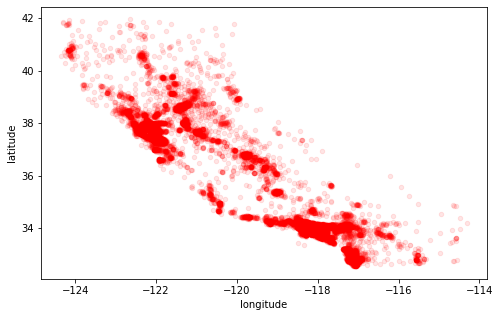

In [18]:
housing_data_cp.plot(kind="scatter", x="longitude", y="latitude", figsize=(8,5), color='r', alpha=0.1)

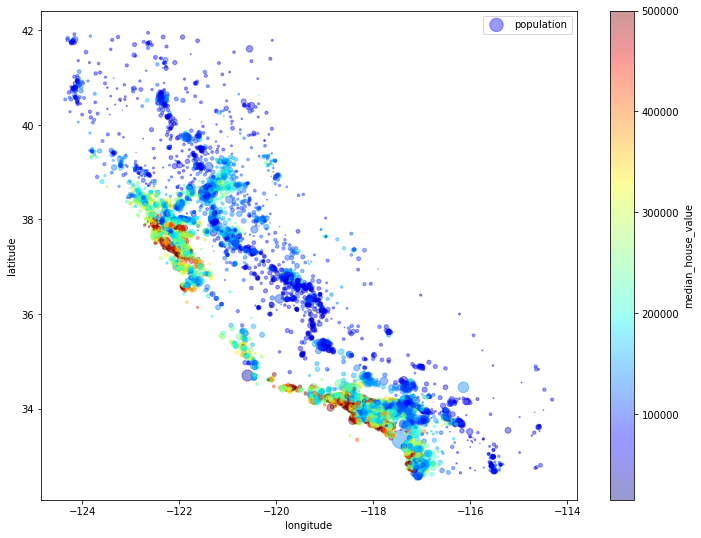

In [19]:
# Colors indicate median house price and circle size represents district populations
housing_data_cp.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing_data_cp["population"] / 100, label="population", 
figsize=(12,9), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()

In [20]:
# pearsons correlation coeff w.r.t median housing values -> 0.68 w/ median_income
corr = housing_data_cp.corr();
corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

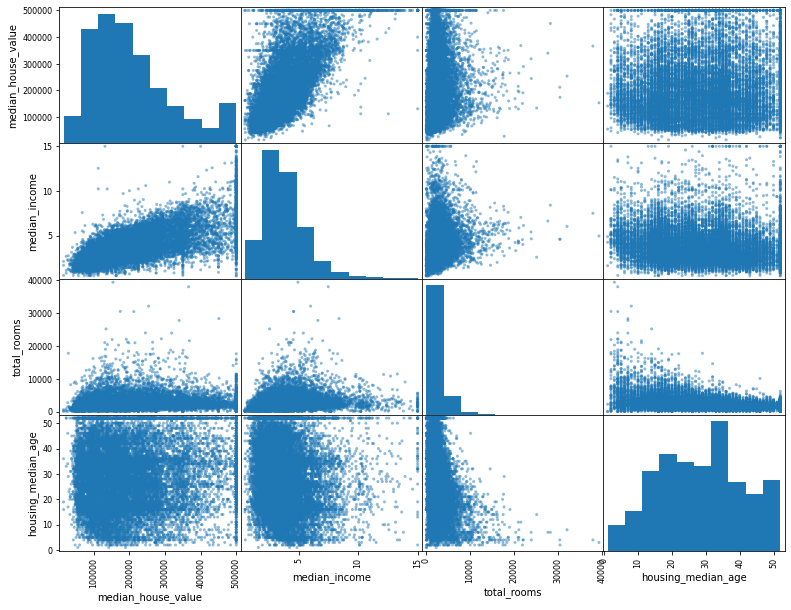

In [21]:
# scatter matrix 

from pandas.plotting import scatter_matrix
cols = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing_data_cp[cols], figsize=(13,10))

<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>

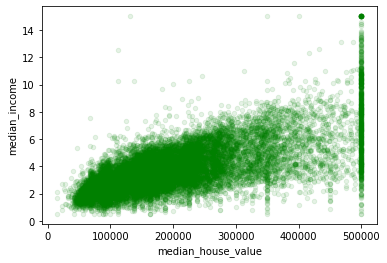

In [22]:
# strong correlation between median_income & median_house_value - also - median_house_value and median_income
housing_data_cp.plot(kind="scatter", x="median_house_value", y="median_income", alpha=0.1, color="g")

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

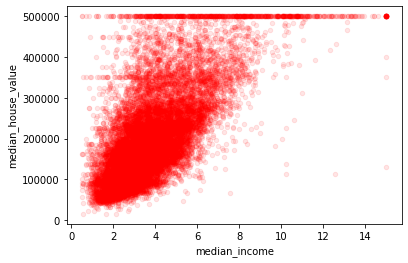

In [23]:
'''
    Since project goal is to predict median_housing_price in a given district, and we know that a given
    district is correlated to the median house price, and therefore as expected a proportional median income. 
    
    This graph confirms this expectation, the strongest correlation with respect to median housing value between
    the given 4 cols is the median income
'''

housing_data_cp.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, color="r")

## Attribute combinations

In [24]:
housing_data_cp["rooms_per_household"] = housing_data_cp["total_rooms"] / housing_data_cp["households"]
housing_data_cp["bedrooms_per_room"] = housing_data_cp["total_bedrooms"] / housing_data_cp["total_rooms"]
housing_data_cp["persons_per_household"] = housing_data_cp["population"] / housing_data_cp["households"] # ave people in a house given the district pop

In [25]:
corr = housing_data_cp.corr()
corr["median_house_value"].sort_values(ascending=False) 

median_house_value       1.000000
median_income            0.687151
rooms_per_household      0.146255
total_rooms              0.135140
housing_median_age       0.114146
households               0.064590
total_bedrooms           0.047781
persons_per_household   -0.021991
population              -0.026882
longitude               -0.047466
latitude                -0.142673
bedrooms_per_room       -0.259952
Name: median_house_value, dtype: float64

In [26]:
# clean dataset
housing_data_cp = train_set.drop("median_house_value", axis=1)
housing_data_cp_labels = train_set["median_house_value"].copy()


## Data Cleaning

In [27]:
# we know from earlier observations that total_bedrooms contain missing values 
# we will however apply an imputer to all attributes incase of input errors during a "launch stage"
housing_data_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [28]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

# imputer can only be applied to numerical attributes:
housing_data_cp_num = housing_data_cp.drop("ocean_proximity", axis=1)

imputer.fit(housing_data_cp_num)
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [29]:
housing_data_cp_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [30]:
x = imputer.transform(housing_data_cp_num)
housing_data_cp_cln = pd.DataFrame(x, columns=housing_data_cp_num.columns, index=housing_data_cp_num.index)
housing_data_cp_cln.info() # numeric missing vals now containing median values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [31]:
# A look though the text col
housing_prox = housing_data_cp[["ocean_proximity"]]
housing_prox.head(15)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [32]:
#  transform categorical variable to numeric data
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_prox_num = ordinal_encoder.fit_transform(housing_prox)
housing_prox_num[:15]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [4.]])

In [33]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [39]:
# OneHot encoder to avoid variable distance bias
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
housing_prox_num_1h = onehot.fit_transform(housing_prox_num)
housing_prox_num_1h

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [42]:
# transformation to dense
housing_prox_num_1h.toarray()
onehot.categories_

[array([0., 1., 2., 3., 4.])]